In [62]:
import pandas as pd
data = pd.read_csv(r'C:/Users/Daksha/Desktop/Sales Data Analysis and Forcasting/sales_data_sample.csv', encoding='ISO-8859-1')


In [63]:
data.head()  # Show first 5 rows
data.info()  # Show summary of the dataset (e.g., data types, null values)
data.describe()  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [64]:
data.isnull().sum()  # Check for missing values
data.ffill(inplace=True)  # Forward fill missing values

In [65]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938        -0.057367   
MSRP               -0.010280         0.017881   0.670625        -0.021067   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010280  
QUANTITYORDERED  0.551426 -0.035323 -0.039048  0.069535  0.017881  
PRICEEACH        0.657841

In [66]:
print(data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


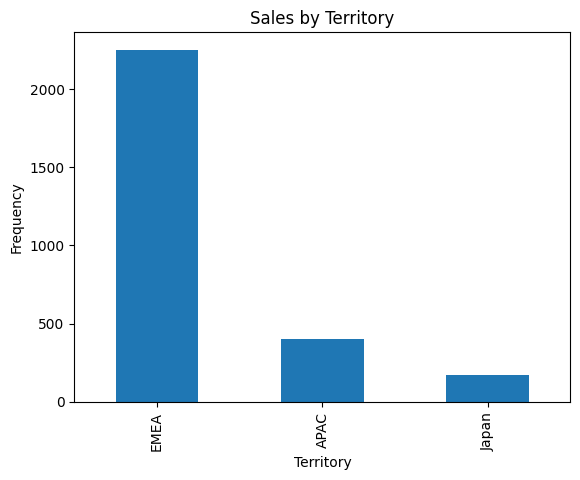

In [67]:
data['TERRITORY'].value_counts().plot(kind='bar')
plt.title('Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Frequency')
plt.show()


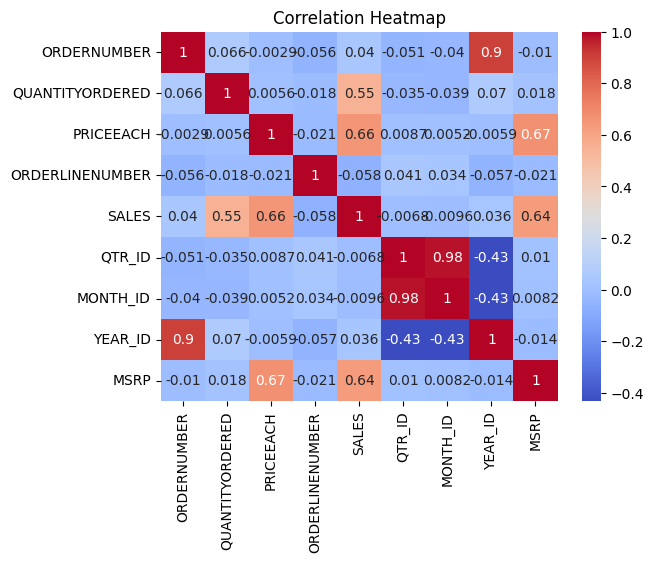

In [68]:
#Heatmaps: Useful to visualize correlations between numerical features.
# Select only numerical columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Generate and plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


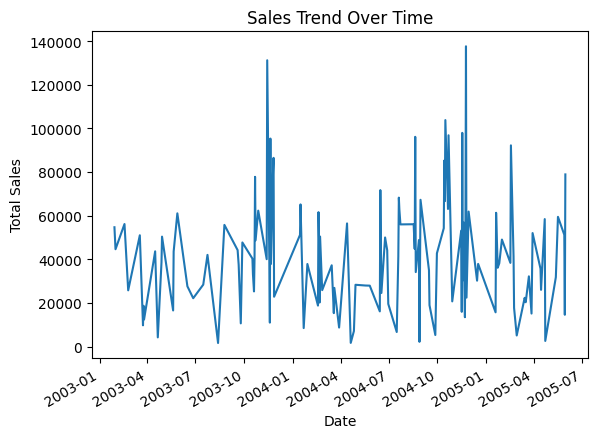

In [69]:
# Convert 'ORDERDATE' to datetime format, allowing mixed formats
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce', dayfirst=False)

# Group by 'ORDERDATE' and plot sales trend over time
data.groupby('ORDERDATE')['SALES'].sum().plot(kind='line')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [70]:
#2. Sales Forecasting with Linear Regression
#Linear Regression is a statistical method used to model the relationship between a dependent variable (e.g., sales) and one or more independent variables (e.g., advertising spend, seasonality, etc.).
#Steps for building a Linear Regression model:
#Preprocess the data: Prepare the data by selecting relevant features (independent variables) and the target (dependent variable).


In [71]:
print(data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [72]:
# Select relevant features (independent variables) for prediction
X = data[['QUANTITYORDERED', 'PRICEEACH']]  # Example features
y = data['SALES']  # Target variable (sales)

In [73]:
#Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
#Train the Linear Regression model:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
#Evaluate the model: You can use metrics like Mean Absolute Error (MAE) or R-squared (R²) to measure the performance of the model.
from sklearn.metrics import mean_absolute_error, r2_score

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

MAE: 773.1863241184022
R²: 0.6885468480396754


In [76]:
#Model Improvement Techniques:
#Feature Engineering: Create new features that might help in improving model accuracy. For instance, you could create features like "days before holidays" or "week of the year" to capture seasonality.
#Hyperparameter Tuning: Use techniques like GridSearchCV to find the best model parameters.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example feature and target selection
X = data[['QUANTITYORDERED', 'PRICEEACH']]  # Example features
y = data['SALES']  # Target variable (sales)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Linear Regression model
model = LinearRegression()

# Define the parameter grid (without the 'normalize' parameter)
param_grid = {'fit_intercept': [True, False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters found by GridSearchCV
print(grid_search.best_params_)


{'fit_intercept': True}


In [78]:
#The output {'fit_intercept': True} from GridSearchCV means that the best hyperparameter found for your model is fit_intercept=True.
#In simple terms, GridSearchCV has determined that including the intercept in the model is the optimal configuration for your dataset.